# Solutions for exercises

## Exercise 1

*Case 1*

| $y$ | $\hat{y}$ | $(y - \hat{y})$ | $(y - \hat{y})^2$ |
| --:| ---------:| ---------------:| -----------------:|
| -1 | 0.2 | -1.2 | 1.44 |
| -1 | 0.4 | -1.4 | 1.96 |
|  1 | -0.2 | 1.2 | 1.44 |
|  1 | -0.4 | 1.4 | 1.96 |

$MSE = (1.44 + 1.96 + 1.44 + 1.96) / 4 = 6.8/4 = 1.7$

*Case 2*

| $y$ | $\hat{y}$ | $(y - \hat{y})$ | $(y - \hat{y})^2$ |
| --:| ---------:| ---------------:| -----------------:|
|  1 | 0.2 | 0.8 | 0.64 |
|  1 | 0.4 | 0.6 | 0.36 |
| -1 | -0.2 | -0.8 | 0.64 |
| -1 | -0.4 | -0.6 | 0.36 |

$MSE = (0.64 + 0.36 + 0.64 + 0.36) / 4 = 2/4 = 0.5$

In the second case MSE is more than three time smaller indicating improvements in the model performance.

## Exercise 3

In [156]:
# copy of the train function from the class
import torch
import torch.nn as nn

def train(model, X_train, labels_train, X_val, labels_val, nepochs = 100, lr = 0.01):
    """ trains any classification model using provided data, number of epochs and learning rate """

    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(nepochs):
        model.train()
        optimizer.zero_grad()
        labels_predicted = model(X_train)
        loss = loss_function(labels_predicted, labels_train)
        loss.backward()
        optimizer.step()
        train_loss = loss.item()

        model.eval()
        labels_predicted = model(X_val)
        loss = loss_function(labels_predicted, labels_val)
        val_loss = loss.item()

        print(f'Epoch {epoch}, train loss: {train_loss:.4f} - validation loss {val_loss:.4f}')

In [157]:
# copy of the predict function form the class

def predict(model, X):
    """ get ANN model and tensor with predictors and returns predicted class label indices """
    model.eval()
    output = model.forward(X)
    _, labels = torch.max(output, 1)
    return labels

In [158]:
# class with the model
import torch.nn.functional as F

class MultiClassModel(nn.Module):
    """ class for three layers ANN """

    def __init__(self):
        super(MultiClassModel, self).__init__()
        self.layer1 = nn.Linear(4, 8)  # first layer: 4 inputs and 8 outputs
        self.layer2 = nn.Linear(8, 16)  # first layer: 8 inputs and 16 outputs
        self.layer3 = nn.Linear(16, 3)  # first layer: 16 inputs and 3 outputs

    def forward(self, x):
        x = F.relu(self.layer1(x)) # pass inputs through the first layer and apply ReLU activation
        x = F.relu(self.layer2(x)) # pass output from layer 1 through the second layer + ReLU activation
        y_hat = self.layer3(x) # pass output from layer 2 through the third layer (no relu)
        return y_hat

In [159]:
# load training data and split to subsets

import pandas as pd
d = pd.read_csv("Iris.csv")

classes = ["setosa", "versicolor", "virginica"]
class_to_idx = {"setosa": 0, "versicolor": 1, "virginica": 2}

X_values = d.iloc[:, 1:5].values
X = torch.tensor(X_values).float()

label_values = [class_to_idx[label] for label in d["Species"]]
labels = torch.tensor(label_values).long()

train_ind = d["Id"] % 5 != 0
test_ind = d["Id"] % 5 == 0

X_train = X[train_ind, :]
labels_train = labels[train_ind]

X_test = X[test_ind, :]
labels_test = labels[test_ind]

In [160]:
# train the model
model = MultiClassModel()
train(model, X_train, labels_train, X_test, labels_test, nepochs = 1000, lr = 0.01)

Epoch 0, train loss: 1.2384 - validation loss 1.2091
Epoch 1, train loss: 1.2243 - validation loss 1.1973
Epoch 2, train loss: 1.2115 - validation loss 1.1866
Epoch 3, train loss: 1.1998 - validation loss 1.1768
Epoch 4, train loss: 1.1892 - validation loss 1.1678
Epoch 5, train loss: 1.1793 - validation loss 1.1594
Epoch 6, train loss: 1.1701 - validation loss 1.1515
Epoch 7, train loss: 1.1615 - validation loss 1.1439
Epoch 8, train loss: 1.1533 - validation loss 1.1367
Epoch 9, train loss: 1.1454 - validation loss 1.1299
Epoch 10, train loss: 1.1380 - validation loss 1.1236
Epoch 11, train loss: 1.1310 - validation loss 1.1177
Epoch 12, train loss: 1.1244 - validation loss 1.1121
Epoch 13, train loss: 1.1182 - validation loss 1.1069
Epoch 14, train loss: 1.1123 - validation loss 1.1018
Epoch 15, train loss: 1.1068 - validation loss 1.0969
Epoch 16, train loss: 1.1015 - validation loss 1.0922
Epoch 17, train loss: 1.0964 - validation loss 1.0874
Epoch 18, train loss: 1.0914 - validat

In [161]:
# load new data and show it
import pandas as pd
d_new = pd.read_csv("IrisHeatmap.csv")
d_new

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.843334,3.054,1.0,0.100000
1,5.843334,3.054,1.0,0.124242
2,5.843334,3.054,1.0,0.148485
3,5.843334,3.054,1.0,0.172727
4,5.843334,3.054,1.0,0.196970
...,...,...,...,...
9995,5.843334,3.054,6.9,2.403030
9996,5.843334,3.054,6.9,2.427273
9997,5.843334,3.054,6.9,2.451515
9998,5.843334,3.054,6.9,2.475758


In [162]:
# get the values and convert them to torch tensor
X_new_values = d_new.iloc[:, 0:4].values
X_new = torch.tensor(X_new_values).float()
X_new.shape

torch.Size([10000, 4])

In [163]:
# make predictions for the new values
labels_new = predict(model, X_new)
labels_new

tensor([0, 0, 0,  ..., 2, 2, 2])

Text(0, 0.5, 'Petal width, cm')

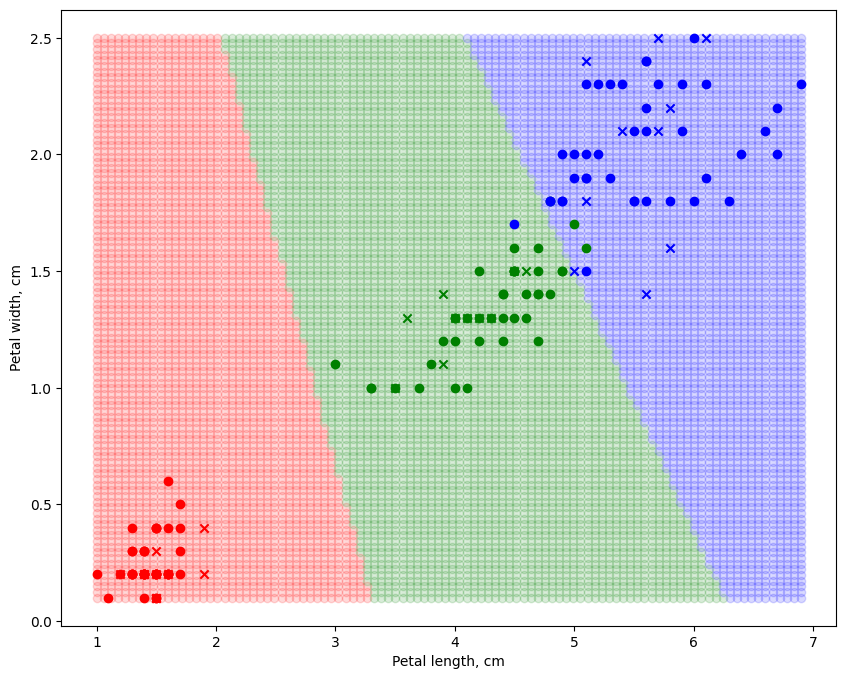

In [164]:
# split tensor with the new values to subset based on predicted labels
se_new = X_new[labels_new == 0]
vi_new = X_new[labels_new == 1]
ve_new = X_new[labels_new == 2]

# split tensor with the training set values to subsets
se_train = X_train[labels_train == 0]
vi_train = X_train[labels_train == 1]
ve_train = X_train[labels_train == 2]

# split tensor with the test set values to subsets
se_test = X_test[labels_test == 0]
vi_test = X_test[labels_test == 1]
ve_test = X_test[labels_test == 2]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# show the predictor points using semi transparent colors
plt.scatter(se_new[:, 2], se_new[:, 3], alpha=0.15, color="red")
plt.scatter(vi_new[:, 2], vi_new[:, 3], alpha=0.15, color="green")
plt.scatter(ve_new[:, 2], ve_new[:, 3], alpha=0.15, color="blue")

# show the training set points using circles
plt.scatter(se_train[:, 2], se_train[:, 3], color="red")
plt.scatter(vi_train[:, 2], vi_train[:, 3], color="green")
plt.scatter(ve_train[:, 2], ve_train[:, 3], color="blue")

# show the test set points using crosses
plt.scatter(se_test[:, 2], se_test[:, 3], marker="x", color="red")
plt.scatter(vi_test[:, 2], vi_test[:, 3], marker="x", color="green")
plt.scatter(ve_test[:, 2], ve_test[:, 3], marker="x", color="blue")

plt.xlabel("Petal length, cm")
plt.ylabel("Petal width, cm")